# KLASTEROVANJE
## Koriscenjem razlicitih algoritama

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib

In [156]:
sirovi_podaci = pd.read_csv('../drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('../drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)

podaci = podaci.drop('Semer', axis = 1)


In [157]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 30


Age       Gender    Education      Country    Ethnicity  \
count  1885.00000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.03461    -0.000256    -0.003806     0.355542    -0.309577   
std       0.87836     0.482588     0.950078     0.700335     0.166226   
min      -0.95197    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.95197    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.07854    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.49788     0.482460     0.454680     0.960820    -0.316850   
max       2.59171     0.482460     1.984370     0.960820     1.907250   

            Nscore       Escore       Oscore       Ascore       Cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

       Impulsiveness           SS  
count    1885.000000  1885.000000  
mean        0.007216    -0.003292  
std         0.954435     0.963701  
min        -2.555240    -2.078480  
25%        -0.711260    -0.525930  
50%        -0.217120     0.079870  
75%         0.529750     0.765400  
max         2.901610     1.921730

In [158]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [159]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA'], 
True


In [160]:
# podaci bez klasa
podaci_bez_klasa = podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
# podaci_bez_klasa = podaci_bez_klasa.drop('Semer', axis = 1)

In [161]:
#skaliramo podatke
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [162]:
podaci_svi = podaci.copy()

def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7


In [163]:
for klasa in klase:
    podaci_svi[klasa] = podaci[klasa].apply(drug_encoder)
# podaci_svi

# KMeans

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def plot_search(X):
    ks = range(2, 30)
    inits = ['random', 'k-means++']
    fig = plt.figure(figsize=(10, 200))
    idx = 1
    silhouette = []
    inertias = []
    for k in ks:
        for init in inits:
            kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
            kmeans.fit(X)
            if init == 'k-means++':
                inertias.append(kmeans.inertia_)
                silhouette.append(silhouette_score(X, kmeans.labels_))
                
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        for label in range(k):
            cluster = X[kmeans.labels_ == label]
            plt.scatter(cluster['Ascore'], cluster['Escore'])
          
        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=atributi)
        plt.scatter(centroids['Ascore'], centroids['Escore'], color='black', marker='x')
          
        s = silhouette_score(X, kmeans.labels_)
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_:.4f}, s={s:.4f}')
          
    plt.tight_layout()

    return inertias, silhouette


In [165]:

X = podaci_bez_klasa.copy()
y = podaci['Coke']
X = pd.DataFrame(scaler.fit_transform(X), columns = atributi)
X

Age  Gender  Education   Country  Ethnicity    Nscore    Escore  \
0     0.409137     1.0   0.537681  1.000000   0.409061  0.560562  0.412116   
1     0.246475     0.0   1.000000  1.000000   0.262143  0.413474  0.796106   
2     0.409137     0.0   0.537681  1.000000   0.262143  0.444788  0.622976   
3     0.000000     1.0   0.814329  1.000000   0.262143  0.492045  0.376883   
4     0.409137     1.0   1.000000  1.000000   0.262143  0.623275  0.250544   
...        ...     ...        ...       ...        ...       ...       ...   
1880  0.000000     1.0   0.412820  0.000000   0.262143  0.336890  0.765875   
1881  0.000000     0.0   0.412820  0.000000   0.262143  0.477550  0.765875   
1882  0.246475     1.0   0.653938  0.000000   0.262143  0.682246  0.289795   
1883  0.000000     1.0   0.412820  0.000000   0.262143  0.649318  0.206510   
1884  0.000000     0.0   0.412820  0.510396   0.262143  0.444788  0.824839   

        Oscore    Ascore    Cscore  Impulsiveness        SS  
0     0.435690  0.367654  0.499040       0.428474  0.224398  
1     0.762567  0.609827  0.479394       0.337920  0.465658  
2     0.392939  0.266061  0.353580       0.215401  0.619957  
3     0.527023  0.585213  0.584415       0.215401  0.224398  
4     0.456995  0.456454  0.688508       0.428474  0.465658  
...        ...       ...       ...            ...       ...  
1880  0.835399  0.609827  0.335773       0.629735  1.000000  
1881  0.624600  0.609827  0.280854       0.629735  0.710933  
1882  0.323599  0.244253  0.300104       0.565343  0.388117  
1883  0.577652  0.266061  0.128634       0.705068  0.825752  
1884  0.798385  0.660789  0.560031       0.629735  0.825752  

[1885 rows x 12 columns]

In [166]:
from sklearn.cluster import KMeans

In [167]:
km = KMeans(n_clusters = 7, n_init='auto', random_state = 42)

In [168]:
km.fit(X)

KMeans(n_clusters=7, n_init='auto', random_state=42)

In [169]:
centers = pd.DataFrame(km.cluster_centers_, columns=atributi)
centers

Age        Gender  Education   Country  Ethnicity    Nscore    Escore  \
0  0.278504  0.000000e+00   0.495841  0.107153   0.261961  0.539728  0.395038   
1  0.198341  0.000000e+00   0.510344  0.967700   0.261362  0.503870  0.529165   
2  0.425516  1.000000e+00   0.575929  0.955719   0.257338  0.490406  0.481526   
3  0.277157  1.000000e+00   0.656834  0.980939   0.263657  0.529452  0.551482   
4  0.201658  1.000000e+00   0.531716  0.063762   0.273869  0.560483  0.487394   
5  0.058583 -5.551115e-17   0.451590  0.081013   0.277214  0.515568  0.527447   
6  0.522970  0.000000e+00   0.588939  0.989985   0.253306  0.455955  0.491125   

     Oscore    Ascore    Cscore  Impulsiveness        SS  
0  0.538176  0.454041  0.481619       0.417349  0.462494  
1  0.550947  0.467446  0.461261       0.577466  0.667255  
2  0.400917  0.559727  0.572905       0.302411  0.234376  
3  0.528514  0.530875  0.529790       0.507382  0.563302  
4  0.610490  0.499711  0.467978       0.517501  0.594151  
5  0.628891  0.458933  0.437589       0.587198  0.749824  
6  0.461461  0.493181  0.523784       0.384499  0.372798

In [170]:
km.inertia_

473.398432188188

In [171]:
podaci_klaster = X.copy()
podaci_klaster['cluster'] = km.labels_
podaci_klaster

Age  Gender  Education   Country  Ethnicity    Nscore    Escore  \
0     0.409137     1.0   0.537681  1.000000   0.409061  0.560562  0.412116   
1     0.246475     0.0   1.000000  1.000000   0.262143  0.413474  0.796106   
2     0.409137     0.0   0.537681  1.000000   0.262143  0.444788  0.622976   
3     0.000000     1.0   0.814329  1.000000   0.262143  0.492045  0.376883   
4     0.409137     1.0   1.000000  1.000000   0.262143  0.623275  0.250544   
...        ...     ...        ...       ...        ...       ...       ...   
1880  0.000000     1.0   0.412820  0.000000   0.262143  0.336890  0.765875   
1881  0.000000     0.0   0.412820  0.000000   0.262143  0.477550  0.765875   
1882  0.246475     1.0   0.653938  0.000000   0.262143  0.682246  0.289795   
1883  0.000000     1.0   0.412820  0.000000   0.262143  0.649318  0.206510   
1884  0.000000     0.0   0.412820  0.510396   0.262143  0.444788  0.824839   

        Oscore    Ascore    Cscore  Impulsiveness        SS  cluster  
0     0.435690  0.367654  0.499040       0.428474  0.224398        2  
1     0.762567  0.609827  0.479394       0.337920  0.465658        6  
2     0.392939  0.266061  0.353580       0.215401  0.619957        6  
3     0.527023  0.585213  0.584415       0.215401  0.224398        2  
4     0.456995  0.456454  0.688508       0.428474  0.465658        3  
...        ...       ...       ...            ...       ...      ...  
1880  0.835399  0.609827  0.335773       0.629735  1.000000        4  
1881  0.624600  0.609827  0.280854       0.629735  0.710933        5  
1882  0.323599  0.244253  0.300104       0.565343  0.388117        4  
1883  0.577652  0.266061  0.128634       0.705068  0.825752        4  
1884  0.798385  0.660789  0.560031       0.629735  0.825752        5  

[1885 rows x 13 columns]

In [172]:
podaci_klaster['cluster'].value_counts()

3    344
2    322
5    307
4    276
6    237
1    203
0    196
Name: cluster, dtype: int64

In [173]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_values = silhouette_samples(X, km.labels_)
silhouette_values
silueta = silhouette_score(X, y)
silueta

-0.0365174194673371

([1005.5924840963938,
  731.359811004764,
  556.2460356533105,
  662.9143250949082,
  506.9308603036239,
  483.01718123922683,
  456.0069727281111,
  443.24808328189647,
  441.9796768965066,
  420.5787710041202,
  420.6578675369732,
  401.18357259746676,
  390.28937570845443,
  388.3865919000968,
  377.6166516412031,
  367.08311123836484,
  366.264658636474,
  359.6787893344124,
  353.2337371912093,
  344.5215483403814,
  345.3616214278667,
  340.2107914519994,
  335.5980872458531,
  328.4956527343598,
  328.92721217946547,
  323.9750083357009,
  317.7370952113505,
  317.2678510486767],
 [0.29593440608533383,
  0.320603755174464,
  0.37732359253857356,
  0.16170537290262624,
  0.27098930903174046,
  0.20234642640358674,
  0.18146966794513628,
  0.16250768998293452,
  0.16097863133135742,
  0.1640112876526617,
  0.15573890914795496,
  0.1357635725415886,
  0.12641079410774286,
  0.12989370156893226,
  0.1339802746096951,
  0.12095978333585627,
  0.12592301836207276,
  0.1212531858143440

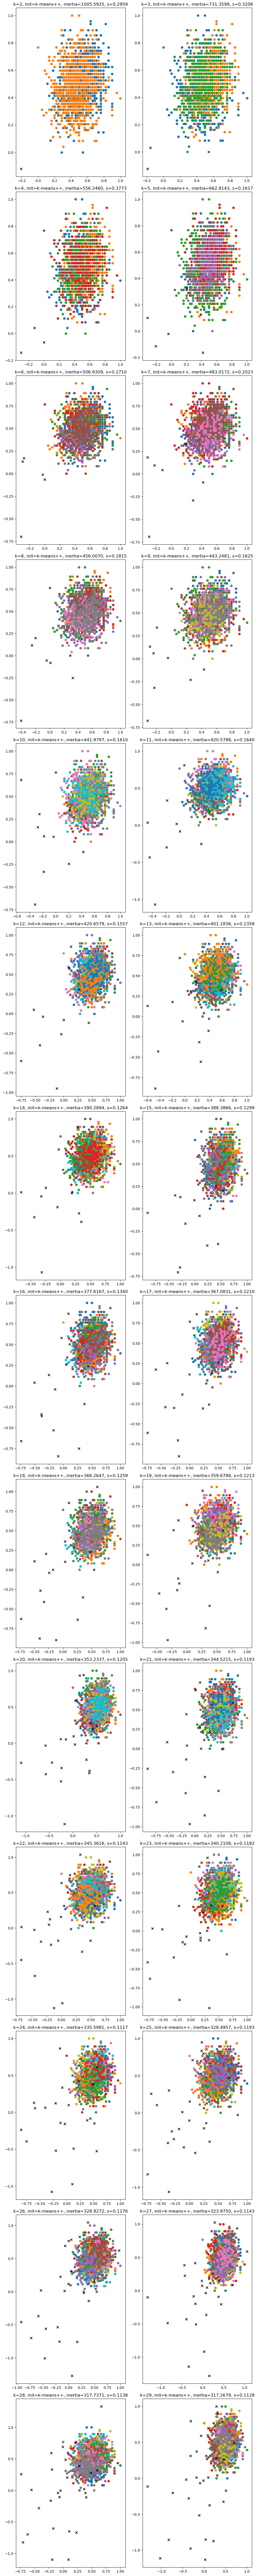

In [56]:
plot_search(X)

In [57]:
len(km.labels_)

1885

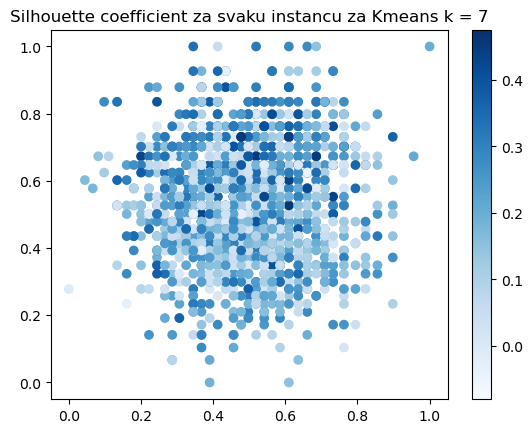

In [58]:
plt.scatter(podaci_klaster['Ascore'], podaci_klaster['Oscore'], c = silhouette_values, cmap = 'Blues')
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu za Kmeans k = 7")
plt.show()

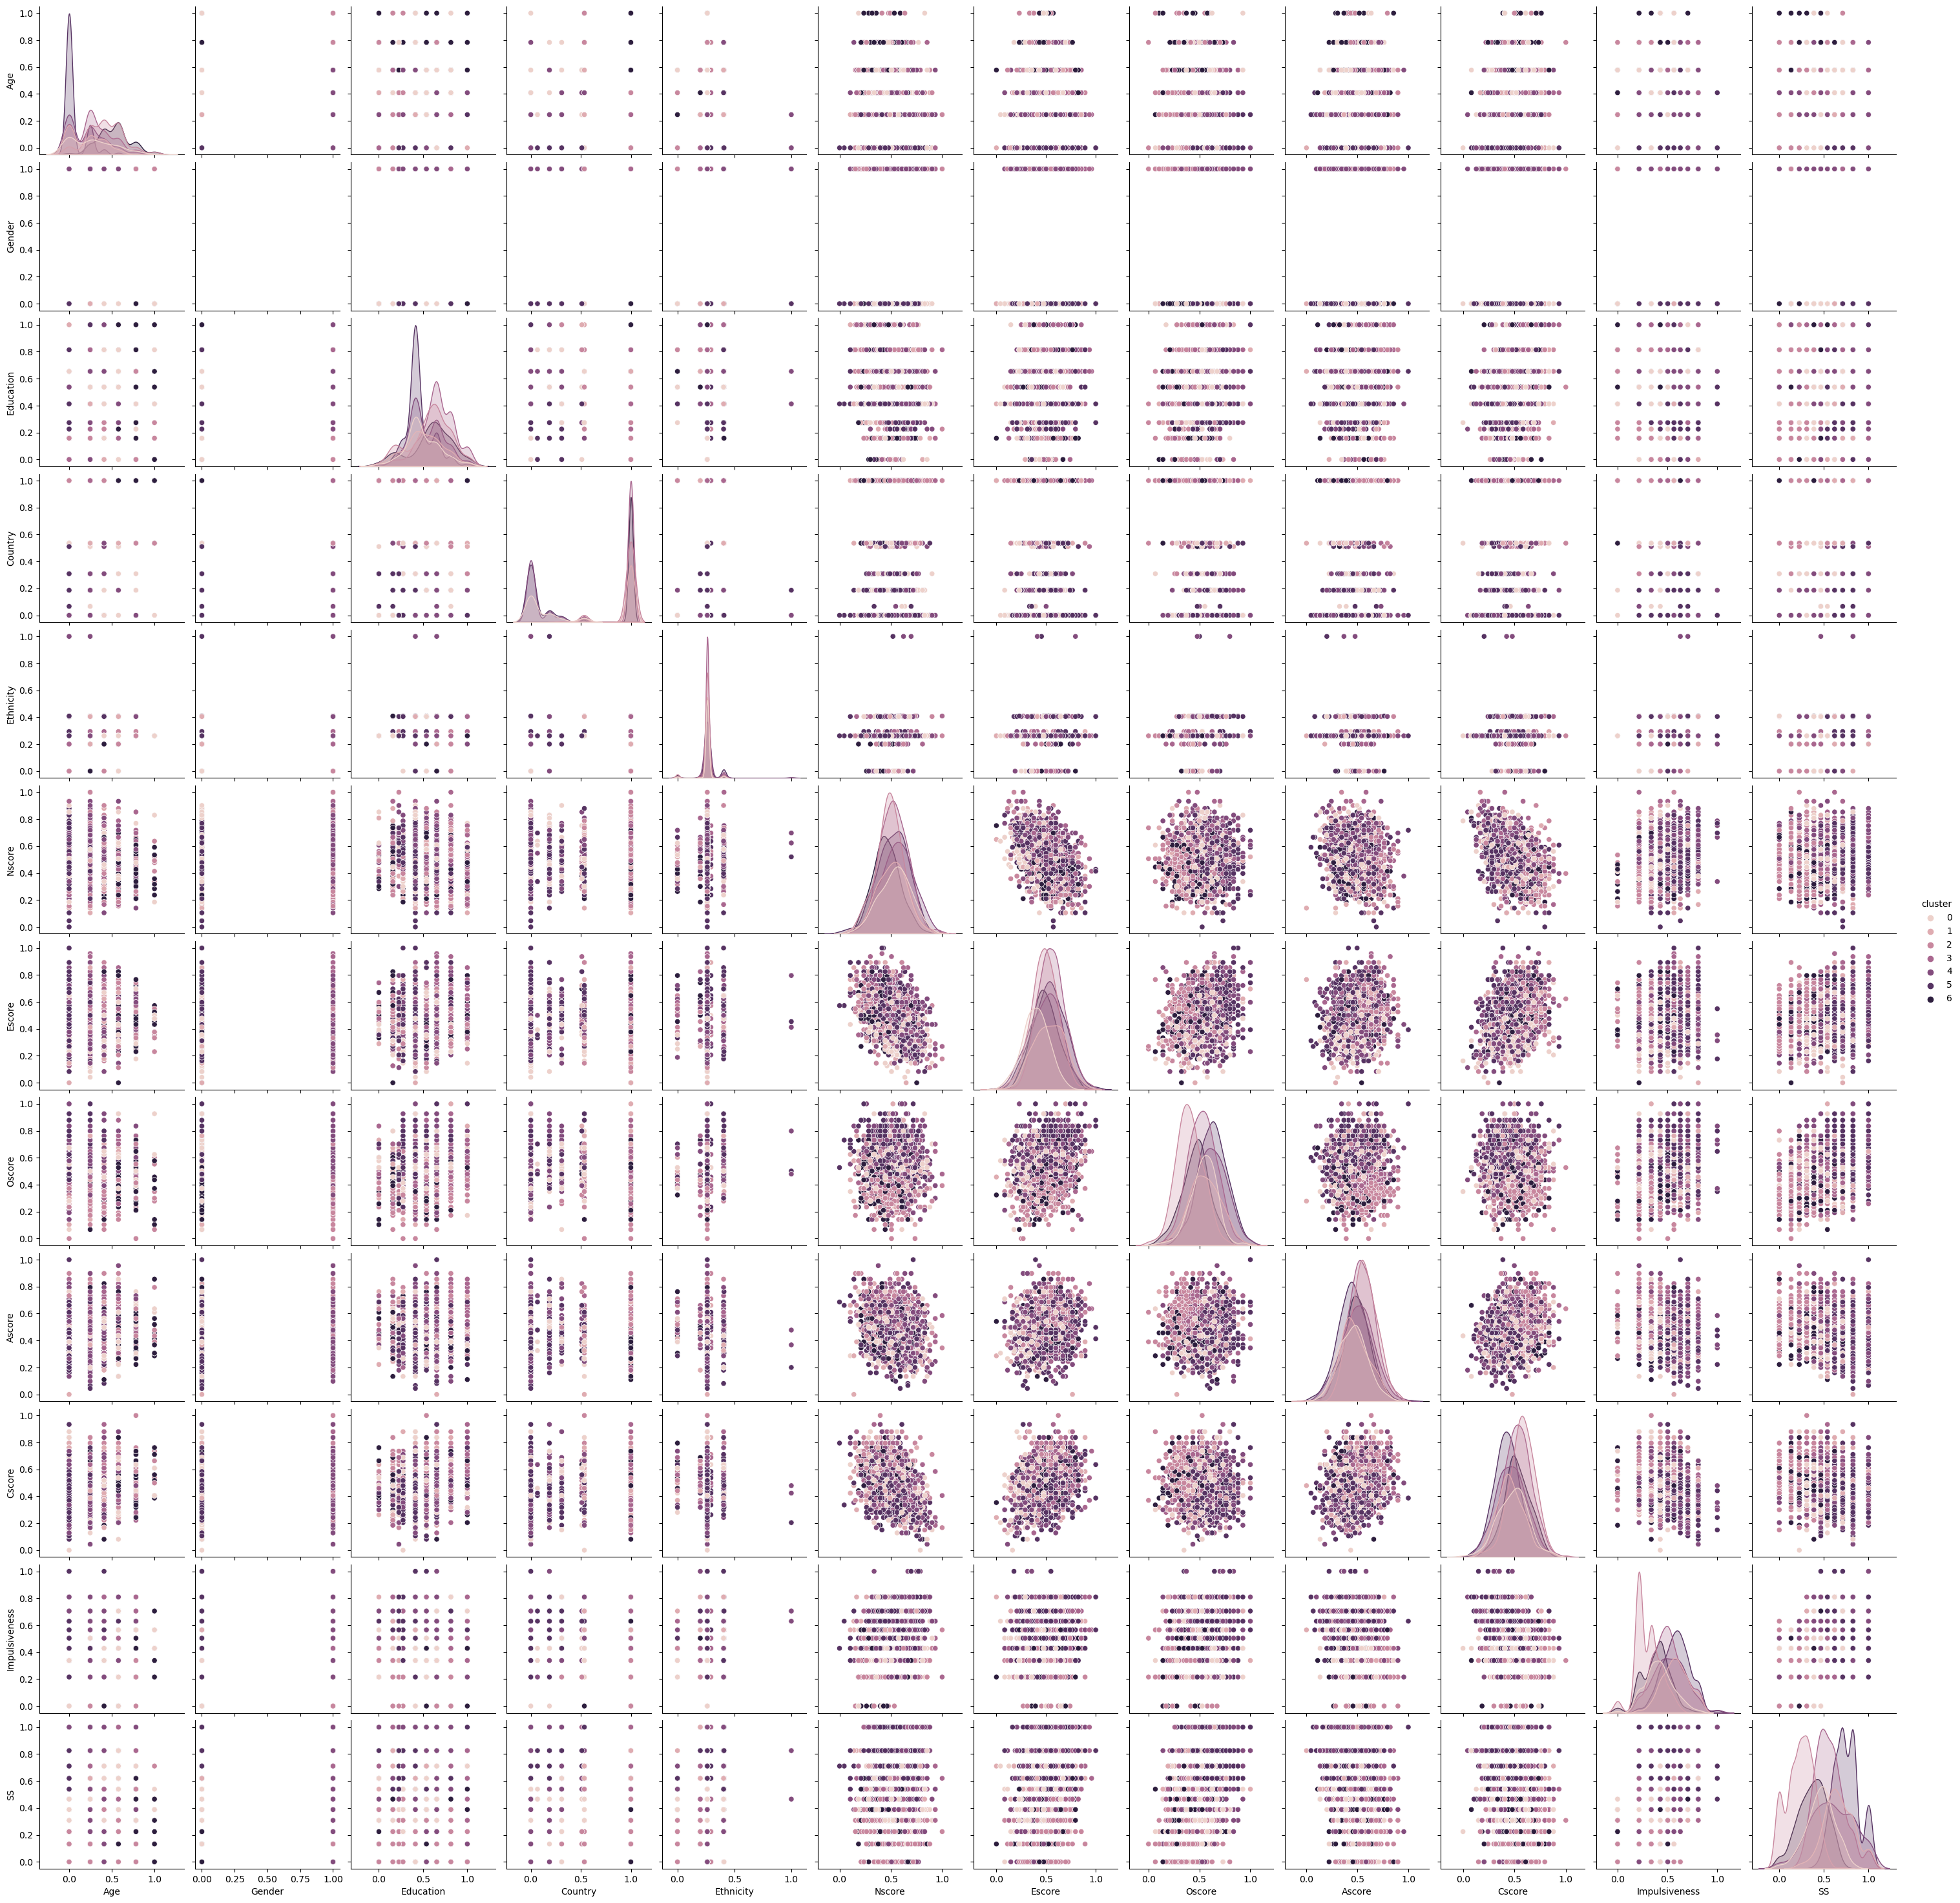

In [59]:
sns.pairplot(podaci_klaster, hue = 'cluster')

In [60]:
def plot_centroids(km):
  
    for c in np.unique(km.labels_):
        elems = X[km.labels_ == c]
        plt.scatter(elems['Ascore'], elems['Escore'], label=c)

    plt.scatter(centers['Ascore'], centers['Escore'], marker='X', label='centroids', c='black')

    plt.xlabel('Ascore')
    plt.ylabel('Escore')
    plt.title('Clustering with sse {}'.format(round(km.inertia_, 2)))
    plt.legend()
    plt.show()


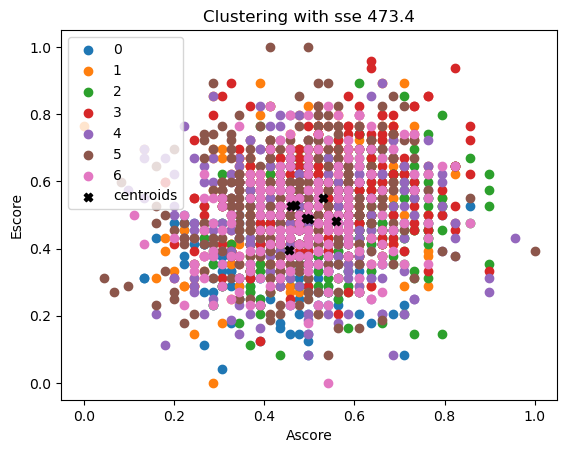

In [61]:
plot_centroids(km)

# sve klase

In [174]:
n = len(klase)
siluete = []
inercije = []
for i in range(n):
    X, y = podaci_bez_klasa, podaci_svi[klase[i]]
    
    for a in atributi:
        X[a] = skaliraj_podatke(X[a])
    
    km = KMeans(n_clusters = 7, n_init='auto', random_state = 42)
    km.fit(X)
    
    inercije.append(km.inertia_)
    siluete.append(silhouette_score(X, y))

In [175]:
podaci_spec = podaci_svi.copy()
niska_korelacija = ['Age', 'Gender', 'Education', 'Alchocol','Ascore','Caff']
for column in niska_korelacija:
    podaci_spec = podaci_spec.drop(column, axis=1)
podaci_spec.head()

Country  Ethnicity   Nscore   Escore   Oscore   Cscore  Impulsiveness  \
0  0.96082    0.12600  0.31287 -0.57545 -0.58331 -0.00665       -0.21712   
1  0.96082   -0.31685 -0.67825  1.93886  1.43533 -0.14277       -0.71126   
2  0.96082   -0.31685 -0.46725  0.80523 -0.84732 -1.01450       -1.37983   
3  0.96082   -0.31685 -0.14882 -0.80615 -0.01928  0.58489       -1.37983   
4  0.96082   -0.31685  0.73545 -1.63340 -0.45174  1.30612       -0.21712   

        SS  Amphet  Amyl  ...  Crack  Ecstasy  Heroin  Ketamin  LegalH  LSD  \
0 -1.18084       2     0  ...      0        0       0        0       0    0   
1 -0.21575       2     2  ...      0        4       0        2       0    2   
2  0.40148       0     0  ...      0        0       0        0       0    0   
3 -1.18084       0     0  ...      0        0       0        2       0    0   
4 -0.21575       1     1  ...      0        1       0        0       1    0   

   Meth  Mushrooms  Nicotine  VSA  
0     0          0         2    0  
1     3          0         4    0  
2     0          1         0    0  
3     0          0         2    0  
4     0          2         2    0  

[5 rows x 24 columns]

In [176]:
klase_spec = []
atributi_spec = []
for x in podaci_spec.columns:
    atributi_spec.append(x)
    if(x == 'SS'):
        break

for x in podaci_spec.columns:
    if(x in atributi_spec):
        continue
    klase_spec.append(x)

In [177]:
podaci_bez_klase_spec = podaci_spec.copy()
for x in klase_spec:
    podaci_bez_klase_spec = podaci_bez_klase_spec.drop(x, axis = 1)

In [178]:
n = len(klase_spec)
siluete_spec = []
inercije_spec = []
for i in range(n):
    X, y = podaci_bez_klase_spec, podaci_spec[klase_spec[i]]
    
    for a in atributi_spec:
        X[a] = skaliraj_podatke(X[a])
    
    km = KMeans(n_clusters = 7, n_init='auto', random_state = 42)
    km.fit(X)
    
    inercije_spec.append(km.inertia_)
    siluete_spec.append(silhouette_score(X, y))

In [179]:
imena_podataka = ["Obicni", "Spec"]

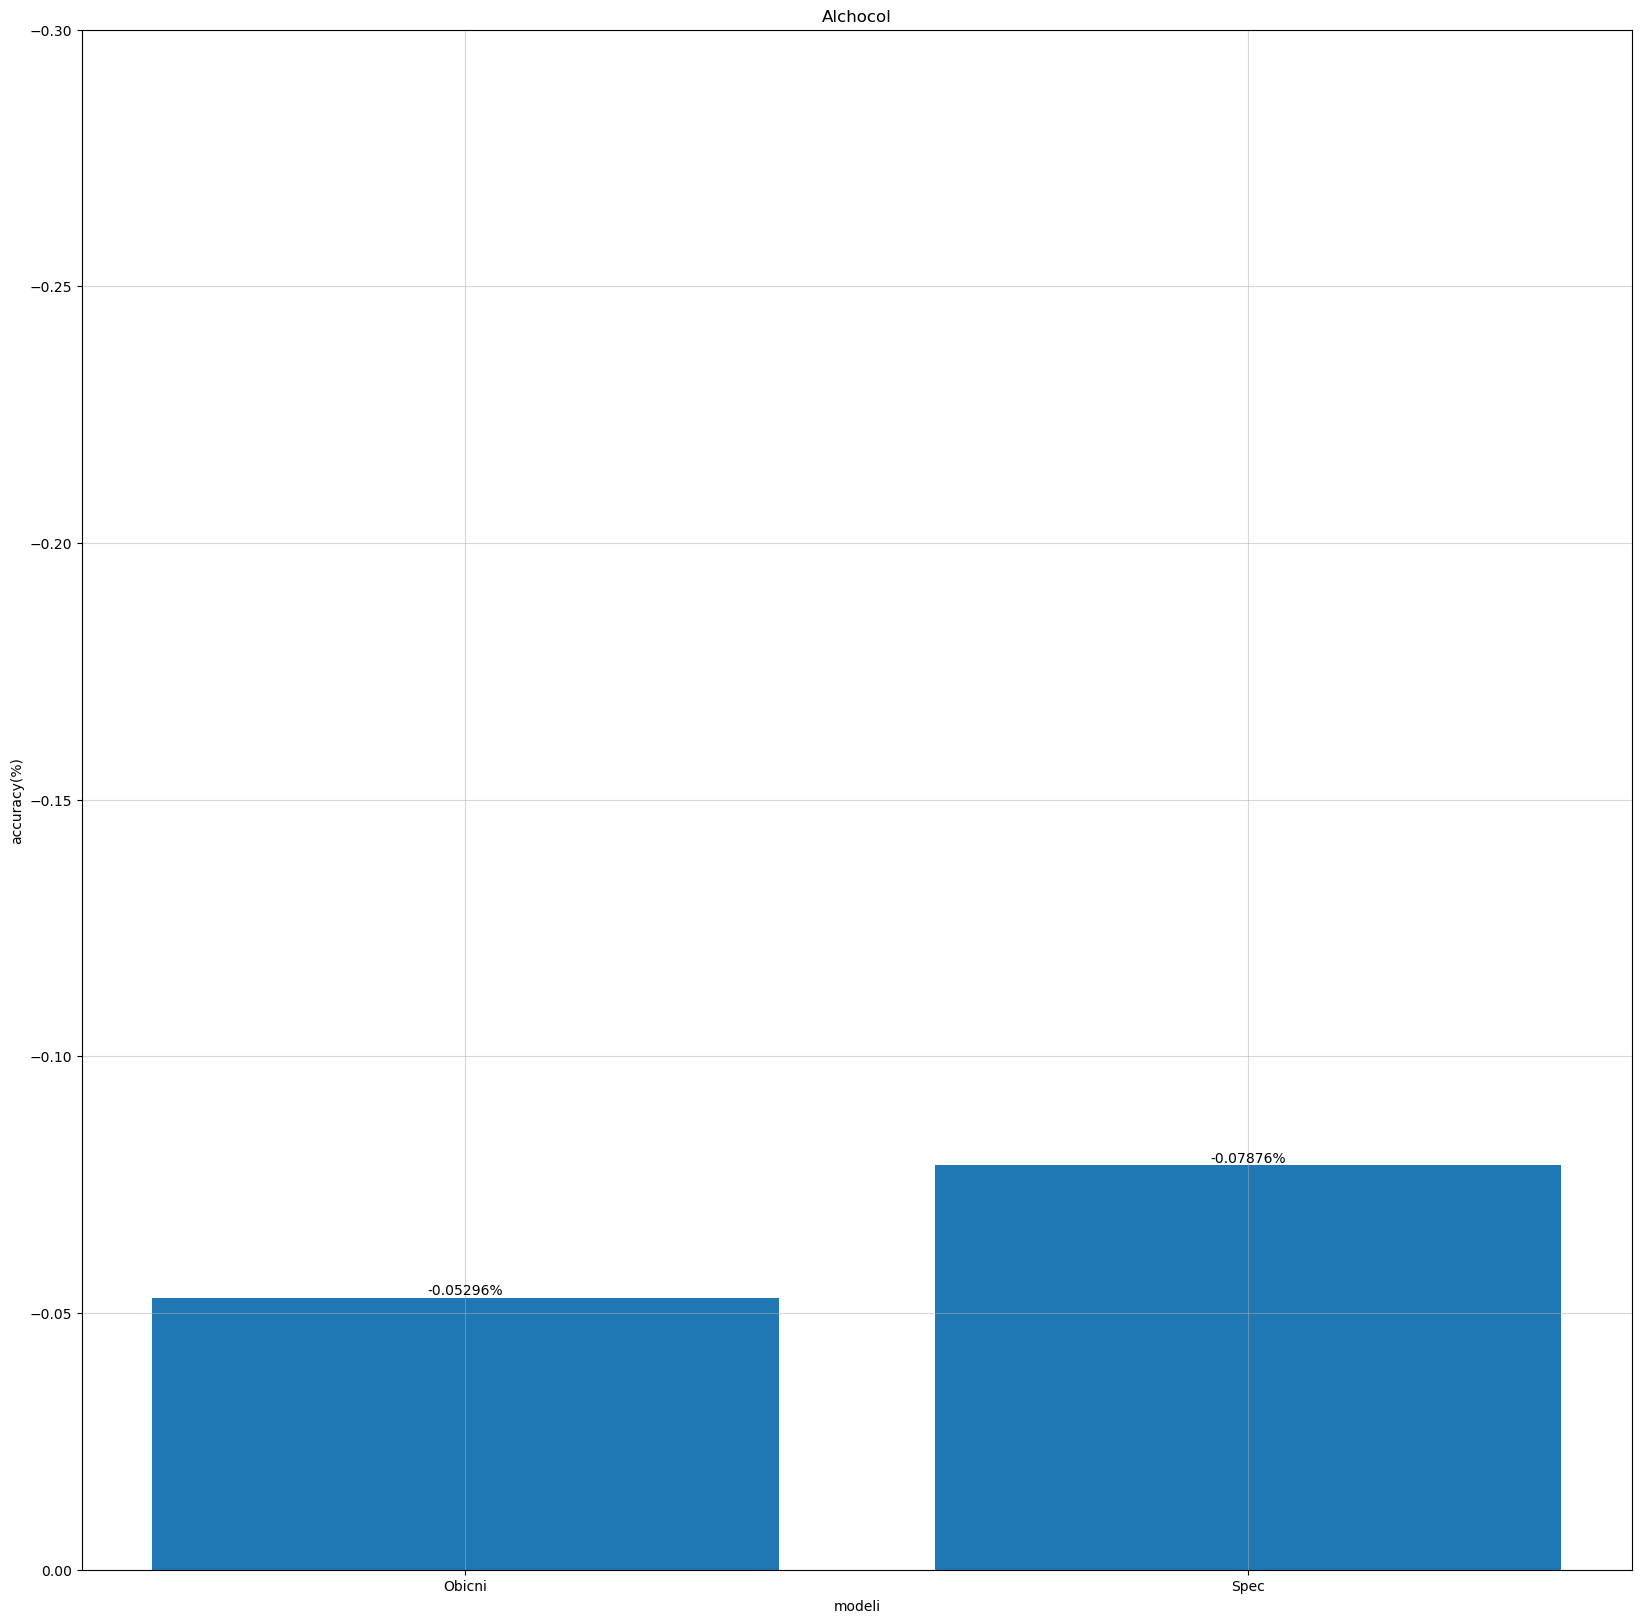

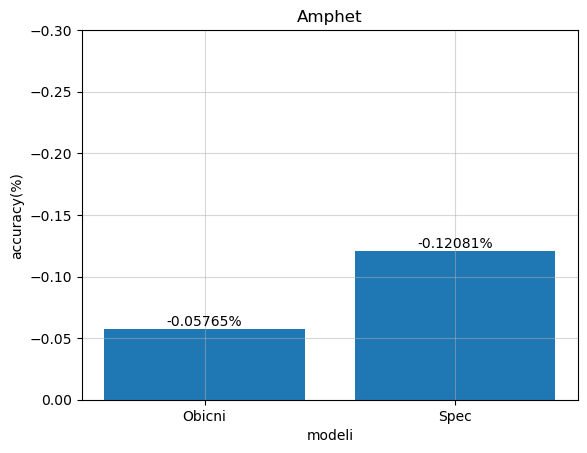

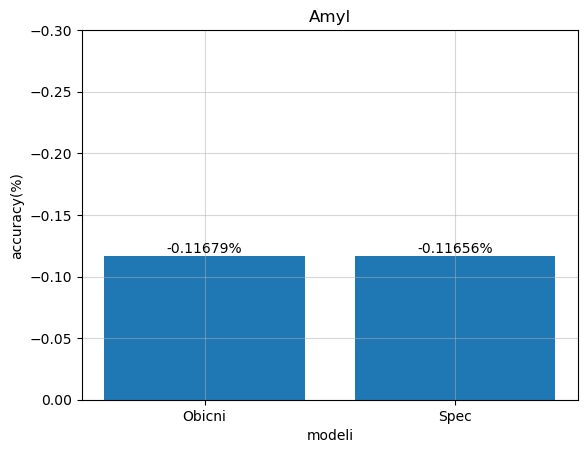

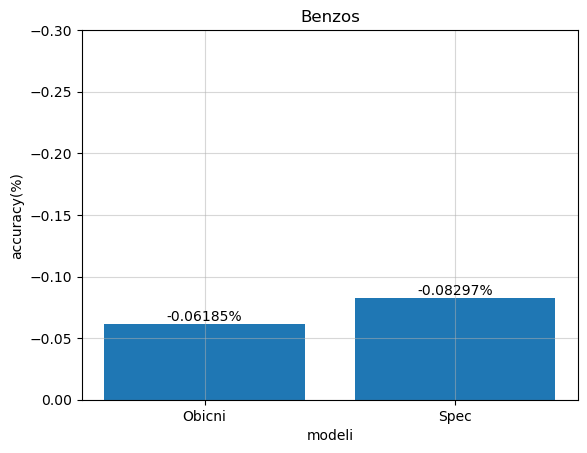

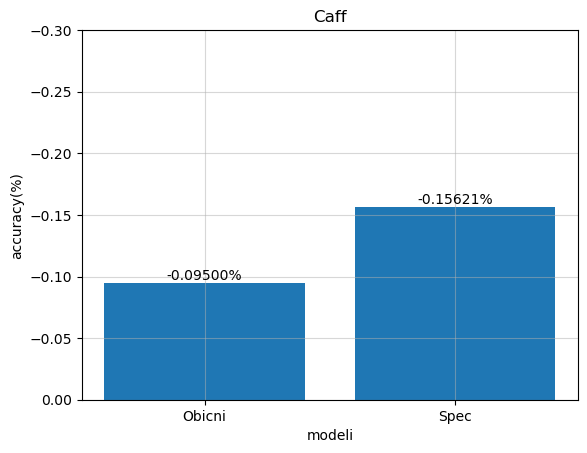

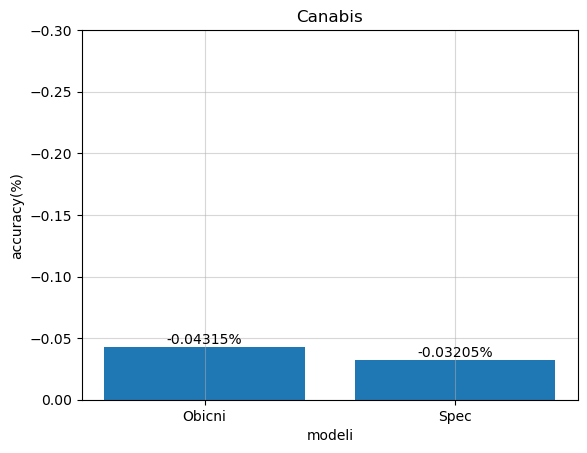

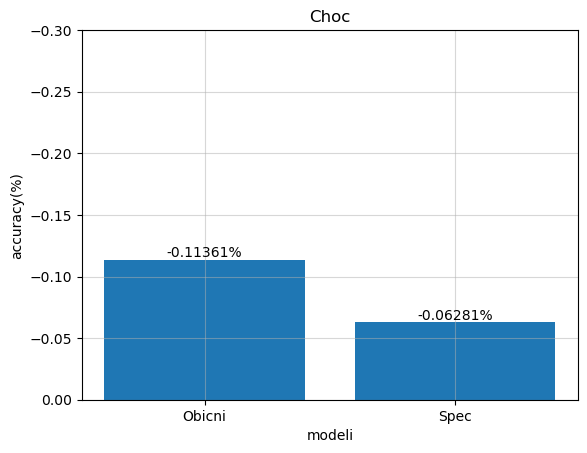

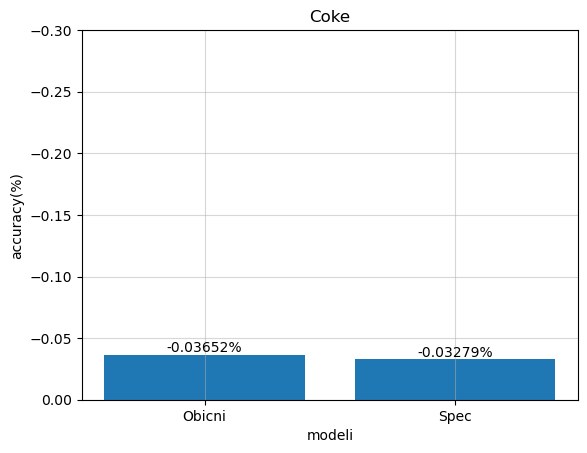

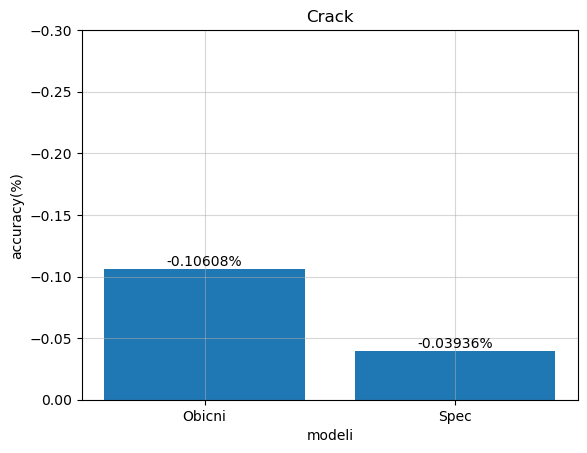

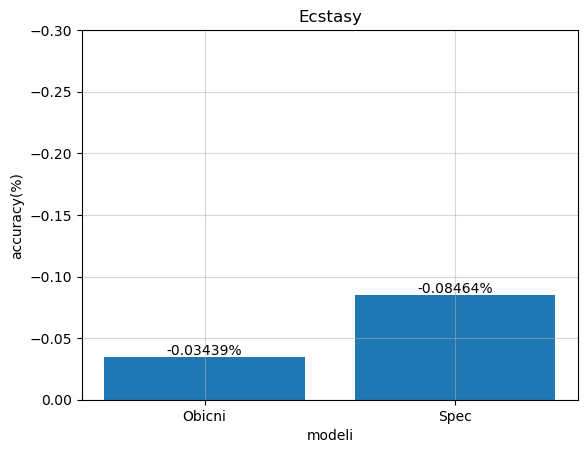

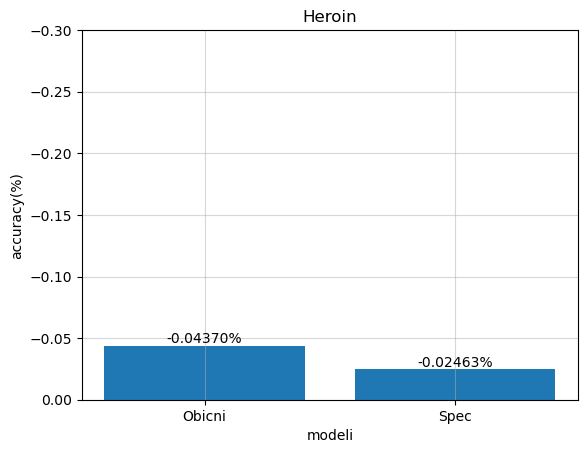

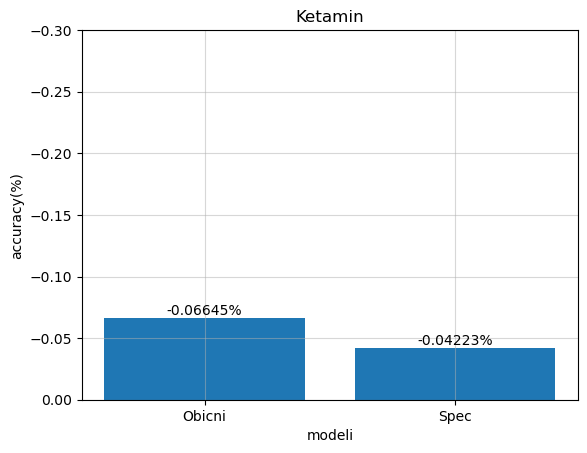

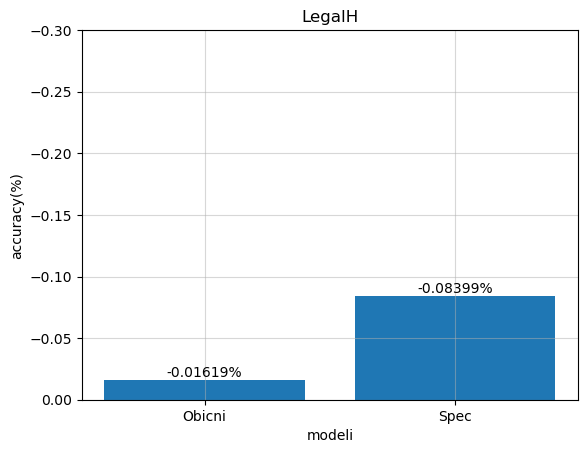

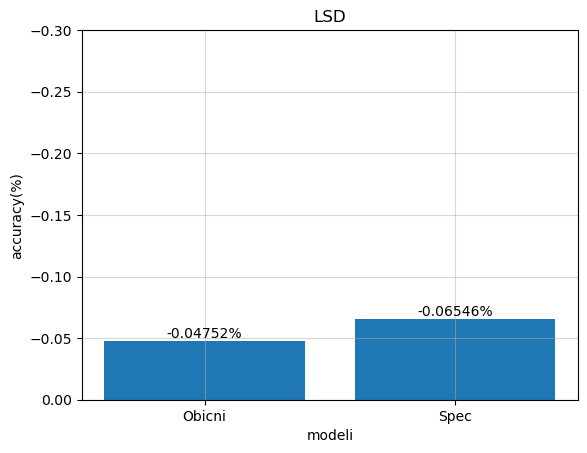

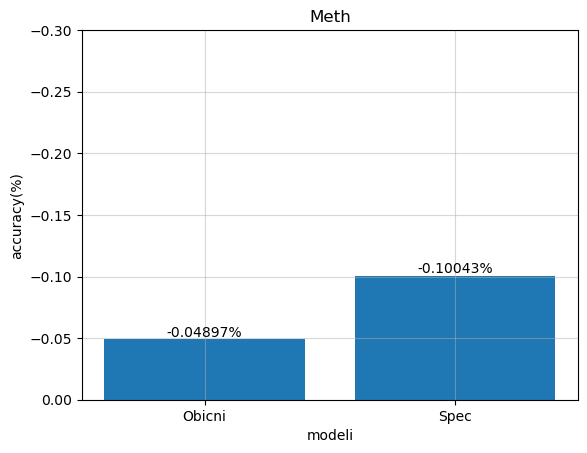

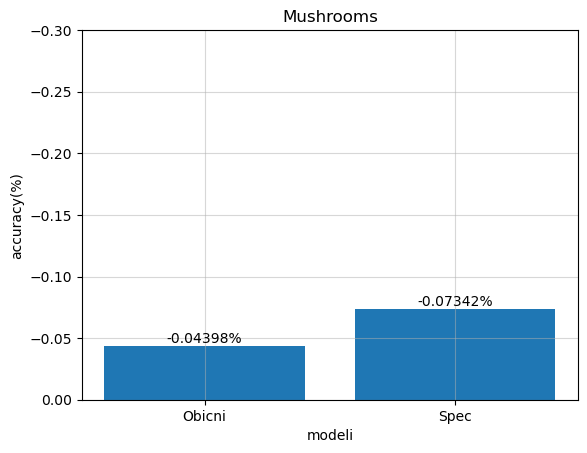

In [180]:
plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [siluete[i], siluete_spec[i]]
    plt.bar(imena_podataka, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.0, -0.3)
    for j, s in enumerate(vrednosti):
        plt.text(imena_podataka[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [181]:
joblib.dump(km, './Modeli/KM.pkl')

['./Modeli/KM.pkl']

# DBSCAN

In [182]:
from sklearn.cluster import DBSCAN

In [183]:
X = podaci_bez_klasa.copy()
y = podaci['Coke']
X = pd.DataFrame(scaler.fit_transform(X), columns = atributi)
X

Age  Gender  Education   Country  Ethnicity    Nscore    Escore  \
0     0.409137     1.0   0.537681  1.000000   0.409061  0.560562  0.412116   
1     0.246475     0.0   1.000000  1.000000   0.262143  0.413474  0.796106   
2     0.409137     0.0   0.537681  1.000000   0.262143  0.444788  0.622976   
3     0.000000     1.0   0.814329  1.000000   0.262143  0.492045  0.376883   
4     0.409137     1.0   1.000000  1.000000   0.262143  0.623275  0.250544   
...        ...     ...        ...       ...        ...       ...       ...   
1880  0.000000     1.0   0.412820  0.000000   0.262143  0.336890  0.765875   
1881  0.000000     0.0   0.412820  0.000000   0.262143  0.477550  0.765875   
1882  0.246475     1.0   0.653938  0.000000   0.262143  0.682246  0.289795   
1883  0.000000     1.0   0.412820  0.000000   0.262143  0.649318  0.206510   
1884  0.000000     0.0   0.412820  0.510396   0.262143  0.444788  0.824839   

        Oscore    Ascore    Cscore  Impulsiveness        SS  
0     0.435690  0.367654  0.499040       0.428474  0.224398  
1     0.762567  0.609827  0.479394       0.337920  0.465658  
2     0.392939  0.266061  0.353580       0.215401  0.619957  
3     0.527023  0.585213  0.584415       0.215401  0.224398  
4     0.456995  0.456454  0.688508       0.428474  0.465658  
...        ...       ...       ...            ...       ...  
1880  0.835399  0.609827  0.335773       0.629735  1.000000  
1881  0.624600  0.609827  0.280854       0.629735  0.710933  
1882  0.323599  0.244253  0.300104       0.565343  0.388117  
1883  0.577652  0.266061  0.128634       0.705068  0.825752  
1884  0.798385  0.660789  0.560031       0.629735  0.825752  

[1885 rows x 12 columns]

In [184]:
# X = podaci_bez_klase_spec

In [198]:
dbs = DBSCAN(eps=0.8, min_samples=2)
dbs.fit(X)

DBSCAN(eps=0.8, min_samples=2)

In [199]:
dbs.labels_

array([0, 1, 1, ..., 0, 0, 1])

In [196]:
silhouette_values = silhouette_samples(X, dbs.labels_)
silhouette_values
silueta = silhouette_score(X, y)
silueta

-0.03651741946733711

In [188]:
podaci_klaster = X.copy()
podaci_klaster['cluster'] = dbs.labels_
podaci_klaster

Age  Gender  Education   Country  Ethnicity    Nscore    Escore  \
0     0.409137     1.0   0.537681  1.000000   0.409061  0.560562  0.412116   
1     0.246475     0.0   1.000000  1.000000   0.262143  0.413474  0.796106   
2     0.409137     0.0   0.537681  1.000000   0.262143  0.444788  0.622976   
3     0.000000     1.0   0.814329  1.000000   0.262143  0.492045  0.376883   
4     0.409137     1.0   1.000000  1.000000   0.262143  0.623275  0.250544   
...        ...     ...        ...       ...        ...       ...       ...   
1880  0.000000     1.0   0.412820  0.000000   0.262143  0.336890  0.765875   
1881  0.000000     0.0   0.412820  0.000000   0.262143  0.477550  0.765875   
1882  0.246475     1.0   0.653938  0.000000   0.262143  0.682246  0.289795   
1883  0.000000     1.0   0.412820  0.000000   0.262143  0.649318  0.206510   
1884  0.000000     0.0   0.412820  0.510396   0.262143  0.444788  0.824839   

        Oscore    Ascore    Cscore  Impulsiveness        SS  cluster  
0     0.435690  0.367654  0.499040       0.428474  0.224398        0  
1     0.762567  0.609827  0.479394       0.337920  0.465658        1  
2     0.392939  0.266061  0.353580       0.215401  0.619957        1  
3     0.527023  0.585213  0.584415       0.215401  0.224398        0  
4     0.456995  0.456454  0.688508       0.428474  0.465658        0  
...        ...       ...       ...            ...       ...      ...  
1880  0.835399  0.609827  0.335773       0.629735  1.000000        2  
1881  0.624600  0.609827  0.280854       0.629735  0.710933        3  
1882  0.323599  0.244253  0.300104       0.565343  0.388117        2  
1883  0.577652  0.266061  0.128634       0.705068  0.825752        2  
1884  0.798385  0.660789  0.560031       0.629735  0.825752        3  

[1885 rows x 13 columns]

In [189]:
def plot_search(X):
    eps_values = list(np.arange(0.3, 0.7, 0.85))
    min_samples = [2, 3, 4, 5]
    fig = plt.figure(figsize=(12, 40))
    silhouette = []
    idx = 1
    for eps in eps_values:
        for min_sample in min_samples:
            model = DBSCAN(eps=eps, min_samples=min_sample)
            model.fit(X)
            silhouette.append(silhouette_score(X, model.labels_))

            fig.add_subplot(len(eps_values), len(min_samples), idx)
            idx += 1

            k = max(model.labels_) + 1
            for cluster_label in range(-1, k):
                cluster = X[model.labels_ == cluster_label]
                if cluster_label == -1:
                    plt.scatter(cluster['Ascore'], cluster['Escore'], label=f'noise', c='Black')
                plt.scatter(cluster['Ascore'], cluster['Escore'], label=f'cluster {cluster_label}')
            plt.title(f'eps={eps}, msamp={min_sample} s={silhouette_score(X, model.labels_):.4f}')

    plt.tight_layout()

    return silhouette 

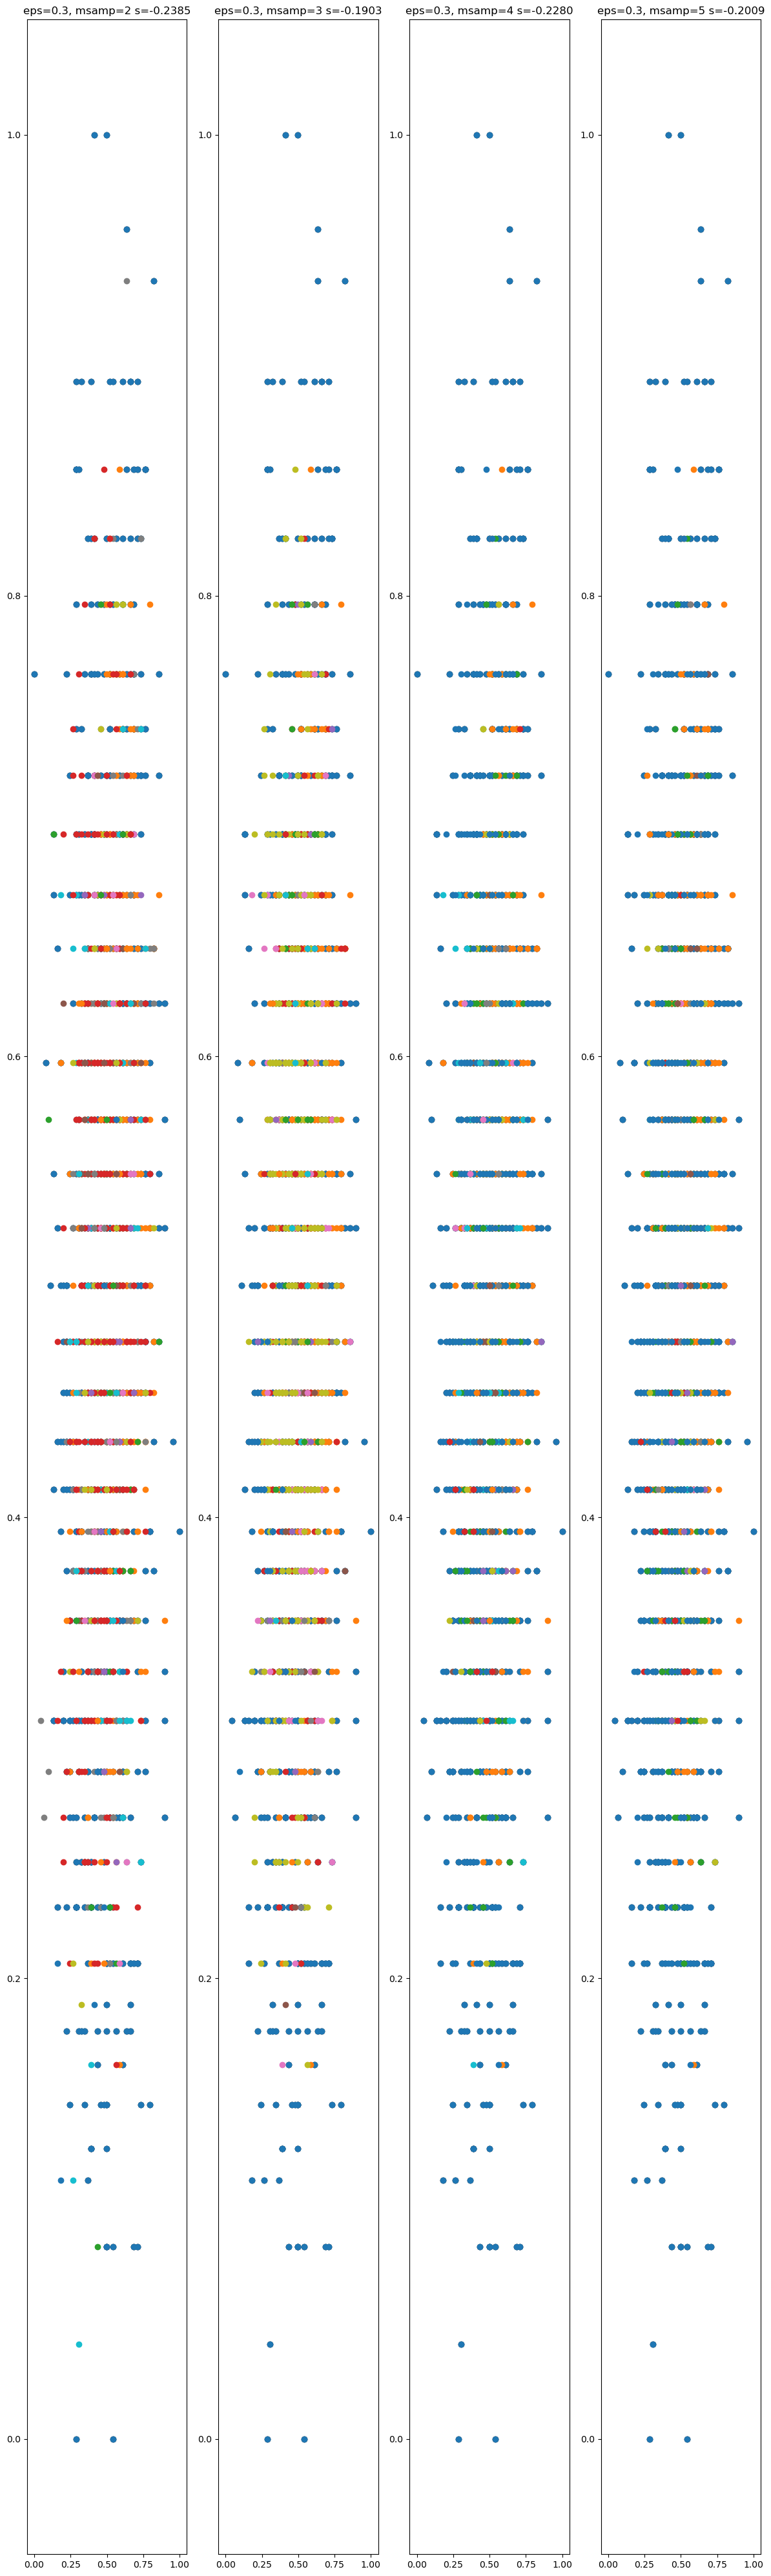

In [190]:
siluetta = plot_search(X)

In [133]:
n = len(klase_spec)
siluete_DBSCAN = []
for i in range(n):
    X, y = podaci_bez_klase_spec, podaci_spec[klase_spec[i]]

    
    for a in atributi_spec:
        X[a] = skaliraj_podatke(X[a])
    
    
    dbs = DBSCAN(eps=1, min_samples=2)
    dbs.fit(X)
    
    siluete_DBSCAN.append(silhouette_score(X, y))

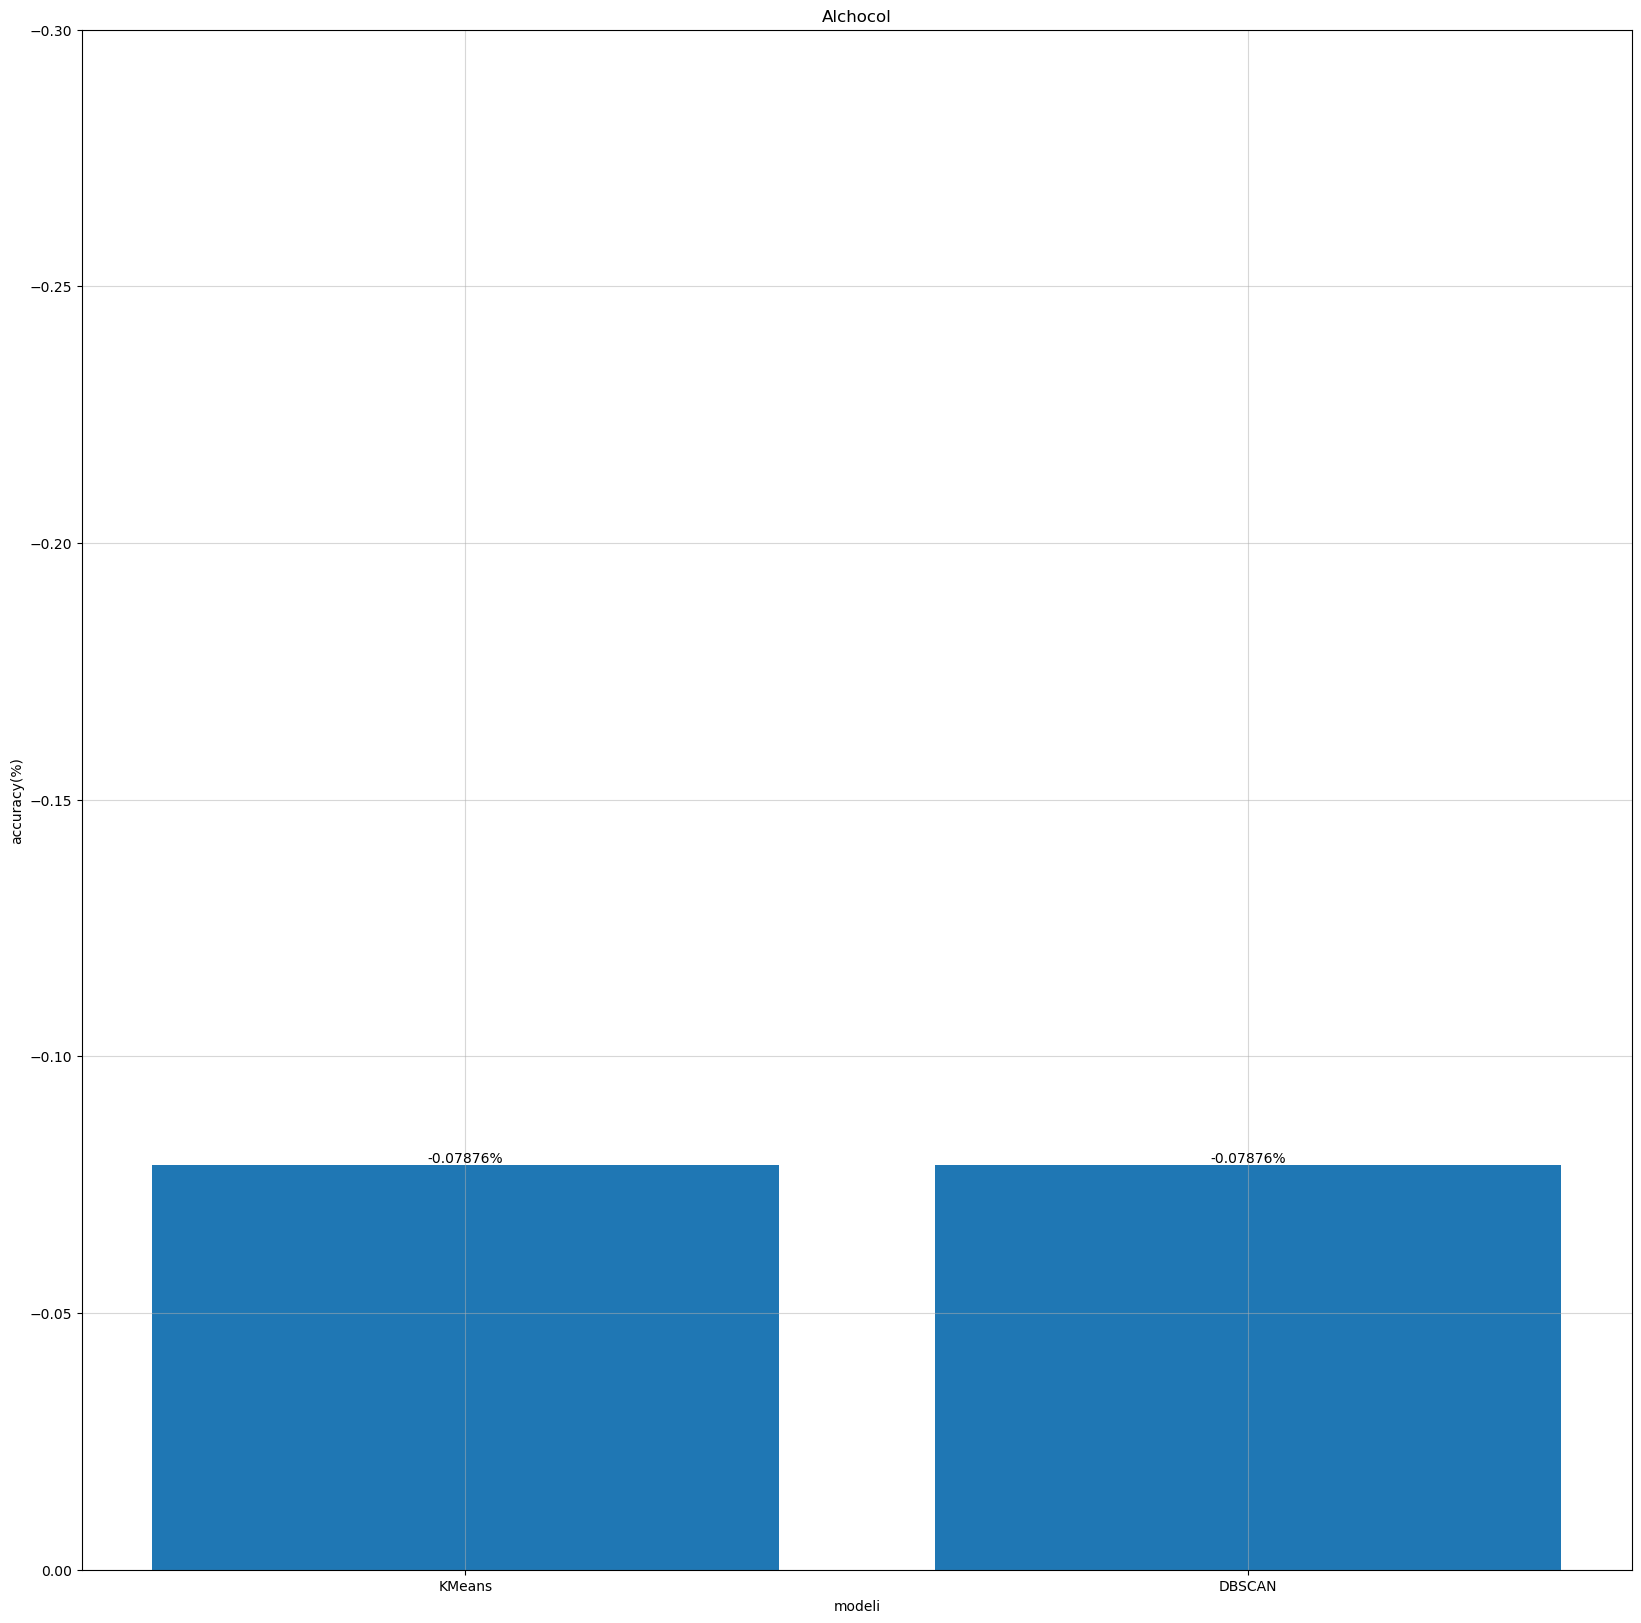

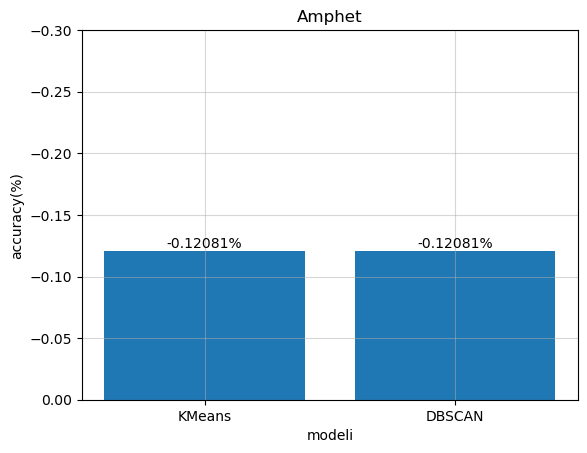

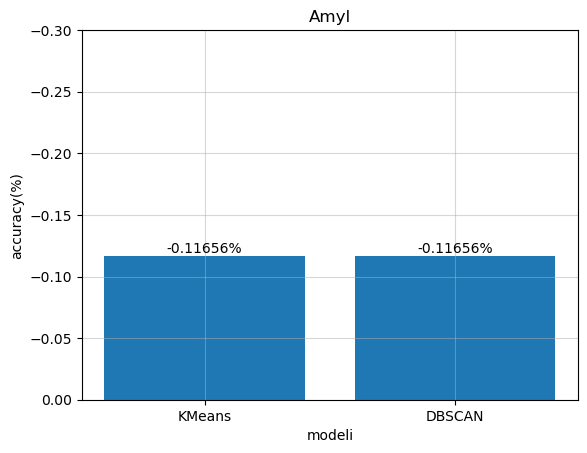

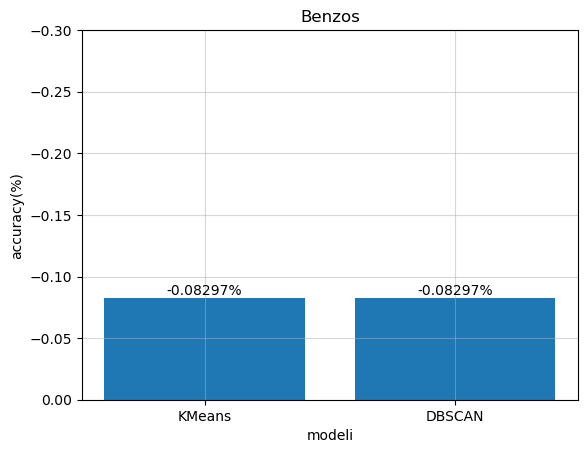

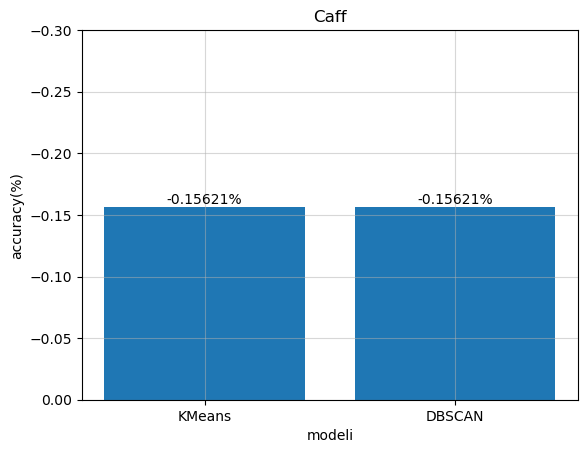

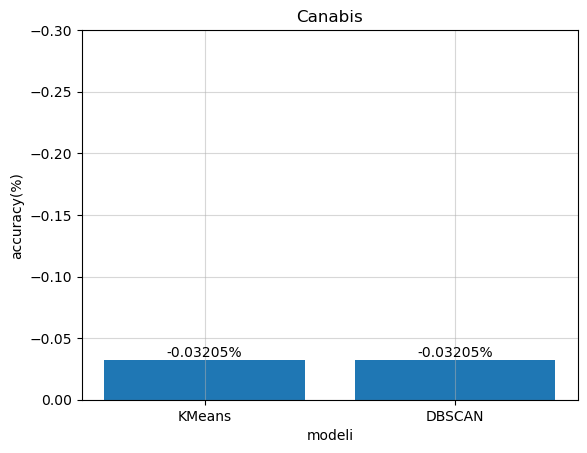

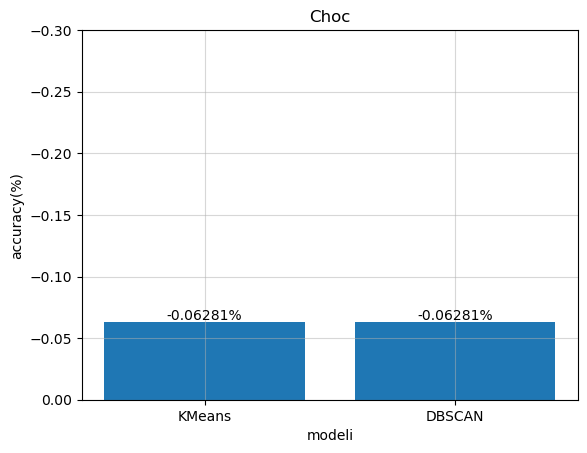

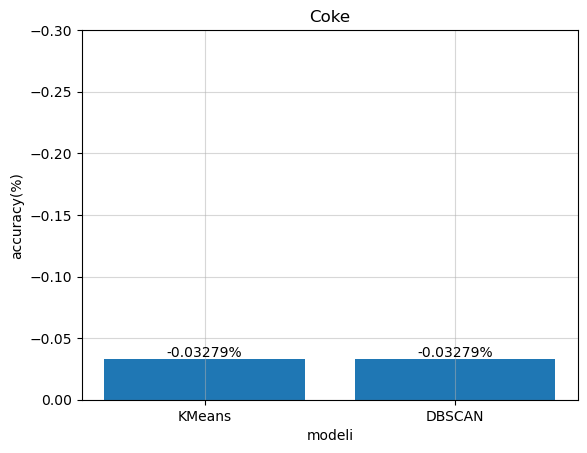

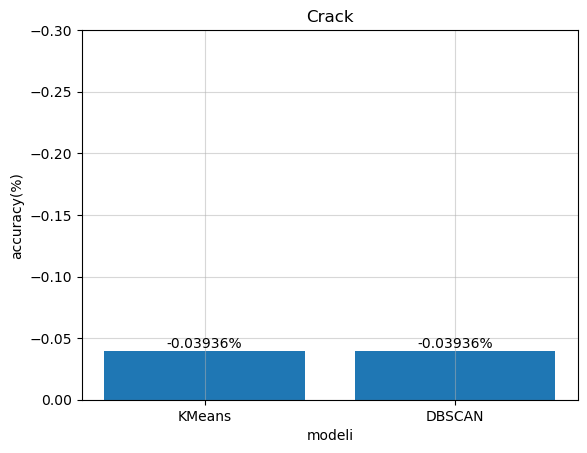

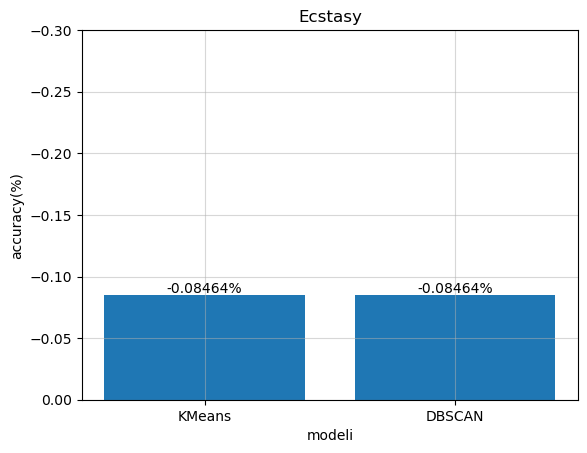

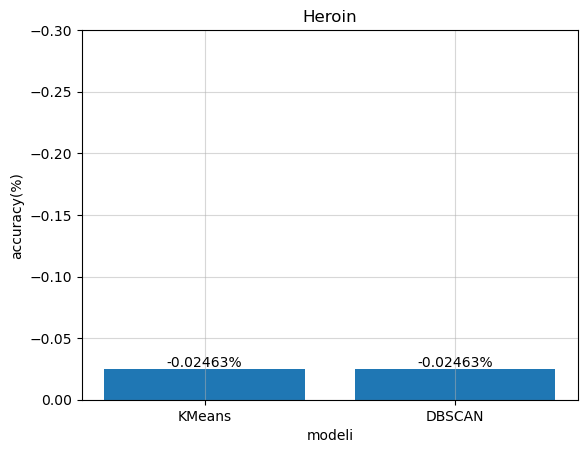

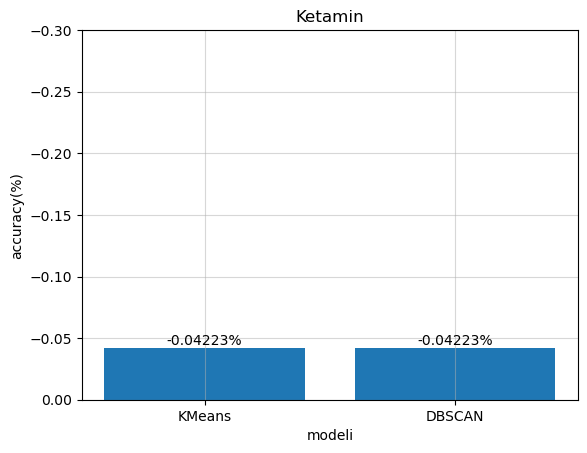

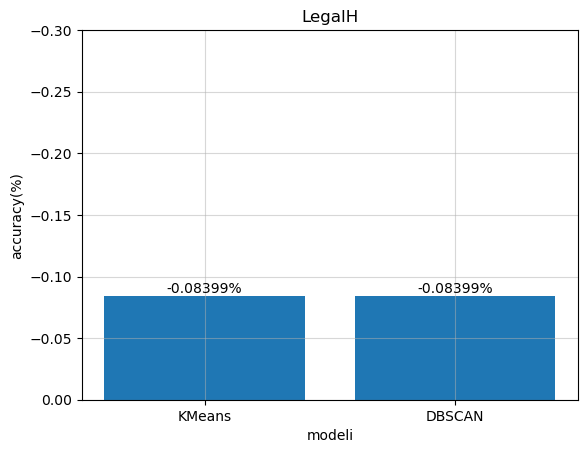

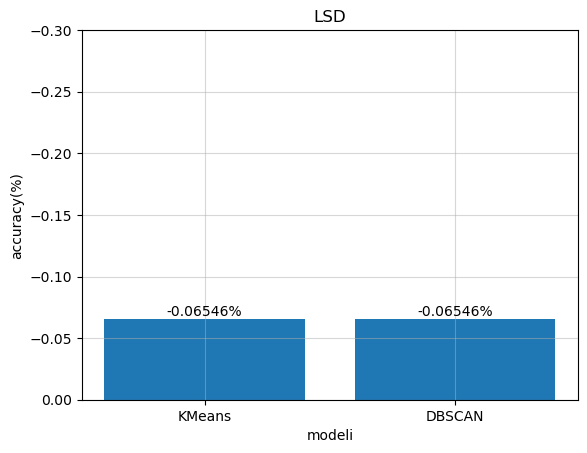

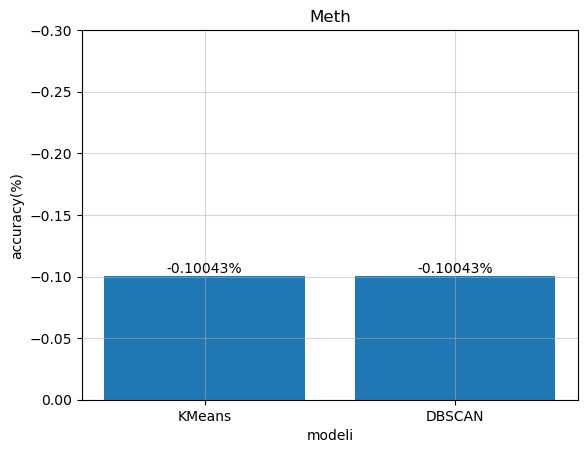

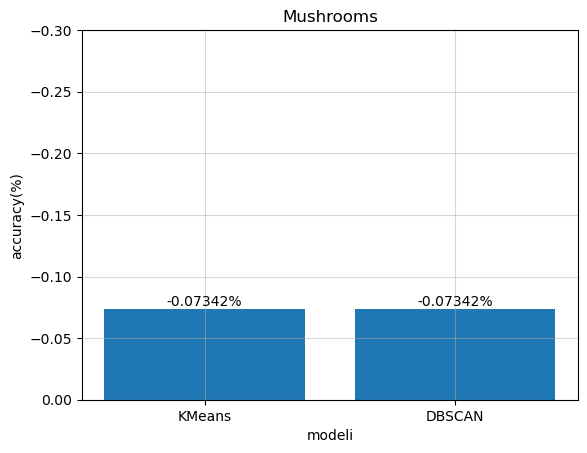

In [134]:
imena_podataka = ["KMeans", "DBSCAN"]

plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [siluete_spec[i], siluete_DBSCAN[i]]
    plt.bar(imena_podataka, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.0, -0.3)
    for j, s in enumerate(vrednosti):
        plt.text(imena_podataka[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [200]:
joblib.dump(dbs, './Modeli/DBSCAN.pkl')

['./Modeli/DBSCAN.pkl']

# AGLOMERATIVE

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
X = podaci_bez_klasa.copy()
y = podaci['Coke']
X = pd.DataFrame(scaler.fit_transform(X), columns = atributi)
X

Age  Gender  Education   Country  Ethnicity    Nscore    Escore  \
0     0.409137     1.0   0.537681  1.000000   0.409061  0.560562  0.412116   
1     0.246475     0.0   1.000000  1.000000   0.262143  0.413474  0.796106   
2     0.409137     0.0   0.537681  1.000000   0.262143  0.444788  0.622976   
3     0.000000     1.0   0.814329  1.000000   0.262143  0.492045  0.376883   
4     0.409137     1.0   1.000000  1.000000   0.262143  0.623275  0.250544   
...        ...     ...        ...       ...        ...       ...       ...   
1880  0.000000     1.0   0.412820  0.000000   0.262143  0.336890  0.765875   
1881  0.000000     0.0   0.412820  0.000000   0.262143  0.477550  0.765875   
1882  0.246475     1.0   0.653938  0.000000   0.262143  0.682246  0.289795   
1883  0.000000     1.0   0.412820  0.000000   0.262143  0.649318  0.206510   
1884  0.000000     0.0   0.412820  0.510396   0.262143  0.444788  0.824839   

        Oscore    Ascore    Cscore  Impulsiveness        SS  
0     0.435690  0.367654  0.499040       0.428474  0.224398  
1     0.762567  0.609827  0.479394       0.337920  0.465658  
2     0.392939  0.266061  0.353580       0.215401  0.619957  
3     0.527023  0.585213  0.584415       0.215401  0.224398  
4     0.456995  0.456454  0.688508       0.428474  0.465658  
...        ...       ...       ...            ...       ...  
1880  0.835399  0.609827  0.335773       0.629735  1.000000  
1881  0.624600  0.609827  0.280854       0.629735  0.710933  
1882  0.323599  0.244253  0.300104       0.565343  0.388117  
1883  0.577652  0.266061  0.128634       0.705068  0.825752  
1884  0.798385  0.660789  0.560031       0.629735  0.825752  

[1885 rows x 12 columns]

In [77]:
for a in atributi:
    X[a] = skaliraj_podatke(X[a])
    

In [78]:
agg = AgglomerativeClustering(n_clusters = 7)
agg.fit(X)

AgglomerativeClustering(n_clusters=7)

In [79]:
children = pd.DataFrame(agg.children_)
children

0     1
0      338  1245
1     1490  1776
2      793   829
3      555  1082
4     1125  1802
...    ...   ...
1879  3751  3760
1880  3759  3761
1881  3762  3765
1882  3763  3764
1883  3766  3767

[1884 rows x 2 columns]

In [80]:
podaci_klaster = X.copy()
podaci_klaster['cluster'] = agg.labels_
podaci_klaster

Age  Gender  Education   Country  Ethnicity    Nscore    Escore  \
0     0.409137     1.0   0.537681  1.000000   0.409061  0.560562  0.412116   
1     0.246475     0.0   1.000000  1.000000   0.262143  0.413474  0.796106   
2     0.409137     0.0   0.537681  1.000000   0.262143  0.444788  0.622976   
3     0.000000     1.0   0.814329  1.000000   0.262143  0.492045  0.376883   
4     0.409137     1.0   1.000000  1.000000   0.262143  0.623275  0.250544   
...        ...     ...        ...       ...        ...       ...       ...   
1880  0.000000     1.0   0.412820  0.000000   0.262143  0.336890  0.765875   
1881  0.000000     0.0   0.412820  0.000000   0.262143  0.477550  0.765875   
1882  0.246475     1.0   0.653938  0.000000   0.262143  0.682246  0.289795   
1883  0.000000     1.0   0.412820  0.000000   0.262143  0.649318  0.206510   
1884  0.000000     0.0   0.412820  0.510396   0.262143  0.444788  0.824839   

        Oscore    Ascore    Cscore  Impulsiveness        SS  cluster  
0     0.435690  0.367654  0.499040       0.428474  0.224398        1  
1     0.762567  0.609827  0.479394       0.337920  0.465658        5  
2     0.392939  0.266061  0.353580       0.215401  0.619957        2  
3     0.527023  0.585213  0.584415       0.215401  0.224398        1  
4     0.456995  0.456454  0.688508       0.428474  0.465658        1  
...        ...       ...       ...            ...       ...      ...  
1880  0.835399  0.609827  0.335773       0.629735  1.000000        0  
1881  0.624600  0.609827  0.280854       0.629735  0.710933        3  
1882  0.323599  0.244253  0.300104       0.565343  0.388117        0  
1883  0.577652  0.266061  0.128634       0.705068  0.825752        0  
1884  0.798385  0.660789  0.560031       0.629735  0.825752        3  

[1885 rows x 13 columns]

In [81]:
podaci_klaster['cluster'].value_counts()


1    392
3    324
0    315
2    261
4    235
6    195
5    163
Name: cluster, dtype: int64

In [82]:
silhouette_values = silhouette_samples(X, agg.labels_)
silhouette_score(X, agg.labels_)


0.1596315952653248

In [83]:
def plot_search(X):
    ks = range(2, 30)
    linkages = ['single', 'complete', 'average']
    fig = plt.figure(figsize=(15, 150))
    idx = 1
    silhouette = []
    for k in ks:
        for linkage in linkages:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            model.fit(X)
            if linkage == 'average':
                silhouette.append(silhouette_score(X, model.labels_))

            fig.add_subplot(len(ks), len(linkages), idx)
            idx += 1
            for cluster_label in range(k):
                cluster = X[model.labels_ == cluster_label]
                plt.scatter(cluster['Ascore'], cluster['Escore'], label=f'cluster {cluster_label}')
            plt.title(f'k={k}, linkage={linkage}, s={silhouette_score(X, model.labels_):.4f}')

    plt.tight_layout()

    return silhouette

In [84]:
ks = range(2, 30)

In [85]:
siluetta = plot_search(X)

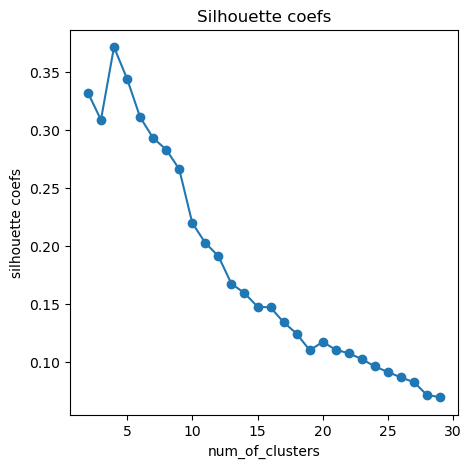

In [86]:
plt.figure(figsize=(5,5))
plt.plot(ks, siluetta, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(X, method='average')
# z

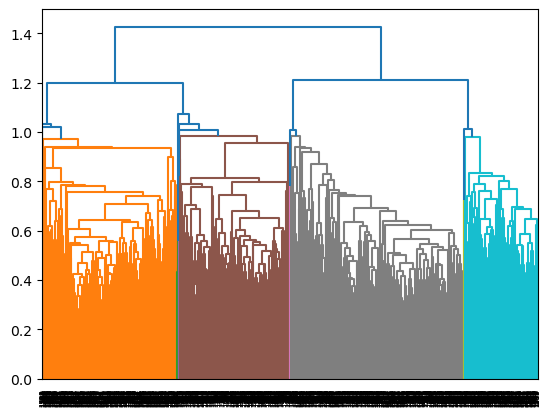

In [88]:
_ = dendrogram(z)

In [89]:
agg = AgglomerativeClustering(n_clusters = 5) #na osnovu testiranja
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [90]:
joblib.dump(agg, './Modeli/Agg.pkl')

['./Modeli/Agg.pkl']